# RNN Image Classification MNIST

Handwritten digit classification on MNIST data using RNN<br>

In [1]:
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

/home/mayank/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('mnist_data/')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [3]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')

In [4]:
test_digits, test_labels = mnist.test.next_batch(200)

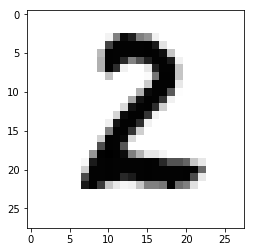

In [5]:
display_digit(test_digits[2])

In [6]:
test_labels[:5]

array([0, 7, 2, 6, 2], dtype=uint8)

In [7]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

In [8]:
tf.reset_default_graph()

In [9]:
X = tf.placeholder(tf.float32, shape = [None, n_steps, n_inputs])

shape = [Batch_size, number_of_steps, dim_of_input]

In [10]:
y = tf.placeholder(tf.int32, shape = [None])

In [11]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [12]:
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [13]:
logits = tf.layers.dense(states, n_outputs)

In [14]:
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)

In [15]:
loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

In [16]:
correct = tf.nn.in_top_k(logits, y, 1)

In [17]:
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [18]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()

test_digits = test_digits.reshape((-1, n_steps, n_inputs))

In [19]:
test_digits.shape

(200, 28, 28)

In [20]:
n_epoch = 10
batch_size = 150
with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epoch):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict = {X: test_digits, y:test_labels})
        
        print('For epoch : ',epoch, ' Train accuracy : ', acc_train, ' Test accuracy : ', acc_test)
        
        save_path = saver.save(sess, './rnn_mnist_model/rnn_mnist_model')

For epoch :  0  Train accuracy :  0.9533333  Test accuracy :  0.94
For epoch :  1  Train accuracy :  0.93333334  Test accuracy :  0.96
For epoch :  2  Train accuracy :  0.93333334  Test accuracy :  0.92
For epoch :  3  Train accuracy :  0.9533333  Test accuracy :  0.98
For epoch :  4  Train accuracy :  0.96  Test accuracy :  0.975
For epoch :  5  Train accuracy :  0.98  Test accuracy :  0.98
For epoch :  6  Train accuracy :  0.9866667  Test accuracy :  0.98
For epoch :  7  Train accuracy :  0.9866667  Test accuracy :  0.97
For epoch :  8  Train accuracy :  0.97333336  Test accuracy :  0.995
For epoch :  9  Train accuracy :  0.98  Test accuracy :  0.99
